Objective - The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the company needs to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_excel('Feedback.xlsx')

In [3]:
dataset.head()

,Age,Gender,Type of Magazine,Motivation for magazine subscription,Subscriber,satisfaction,Quality of content.,Print quality.,Price of the magazine.,Unbiased reporting.,Delivery of Magazine,Customer Service,Paper Quality.,Coverage.,Perception about Outlook,Areas over which Outlook needs improvement
0,23,Male,Money Monthly,Ease of purchase,Online Subscriber,Satisfied,3,3,5,4,3,1,2,4,Fair,Customer service
1,35,Female,Hindi Fortnightly,Discounted prices,Offline Subscriber,Satisfied,4,3,2,4,1,1,4,5,Good,Delivery
2,35,Female,Hindi Fortnightly,Ease of purchase,Online Subscriber,Satisfied,4,4,5,5,3,3,5,5,Good,Delivery
3,24,Male,Business Fortnightly,Ease of purchase,Online Subscriber,Dissatisfied,4,4,4,4,3,3,4,4,Fair,Delivery
4,30,Male,Money Monthly,Ease of purchase,Online Subscriber,Satisfied,4,4,4,5,3,2,5,5,Good,Customer service


Exploratory Data Analysis Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [4]:
dataset.dtypes

Age                                            int64
Gender                                        object
Type of Magazine                              object
Motivation for magazine subscription          object
Subscriber                                    object
satisfaction                                  object
Quality of content.                            int64
Print quality.                                 int64
Price of the magazine.                         int64
Unbiased reporting.                            int64
Delivery of Magazine                           int64
Customer Service                               int64
Paper Quality.                                 int64
Coverage.                                      int64
Perception about Outlook                      object
Areas over which Outlook needs improvement    object
dtype: object

Missing Data- We can use seaborn to create a simple heatmap to see where we are missing data!

In [5]:
dataset.isnull().sum()

Age                                           0
Gender                                        0
Type of Magazine                              0
Motivation for magazine subscription          0
Subscriber                                    0
satisfaction                                  0
Quality of content.                           0
Print quality.                                0
Price of the magazine.                        0
Unbiased reporting.                           0
Delivery of Magazine                          0
Customer Service                              0
Paper Quality.                                0
Coverage.                                     0
Perception about Outlook                      0
Areas over which Outlook needs improvement    0
dtype: int64

<AxesSubplot:>

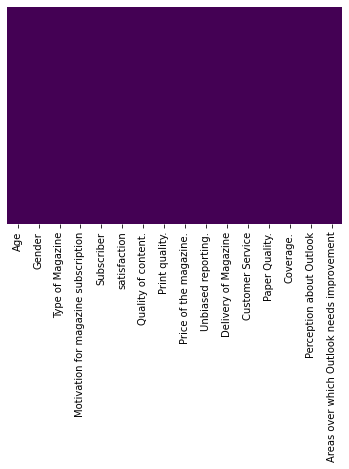

In [6]:
#to check the null values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
dataset.describe()

,Age,Quality of content.,Print quality.,Price of the magazine.,Unbiased reporting.,Delivery of Magazine,Customer Service,Paper Quality.,Coverage.
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,34.373333,4.006667,4.060000,4.050000,4.466667,2.523333,2.373333,4.106667,3.813333
std,7.854059,0.703519,0.916077,0.936531,0.742108,1.177885,1.066653,0.759745,1.000914
min,21.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,4.000000,3.000000
50%,35.000000,4.000000,4.000000,4.000000,5.000000,2.000000,2.000000,4.000000,4.000000
75%,42.000000,4.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000
max,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Categorical Variables

In [8]:
#to check the categorical feature
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['Gender',
 'Type of Magazine',
 'Motivation for magazine subscription',
 'Subscriber',
 'satisfaction',
 'Perception about Outlook',
 'Areas over which Outlook needs improvement']

In [9]:
dataset[categorical_features].head()

,Gender,Type of Magazine,Motivation for magazine subscription,Subscriber,satisfaction,Perception about Outlook,Areas over which Outlook needs improvement
0,Male,Money Monthly,Ease of purchase,Online Subscriber,Satisfied,Fair,Customer service
1,Female,Hindi Fortnightly,Discounted prices,Offline Subscriber,Satisfied,Good,Delivery
2,Female,Hindi Fortnightly,Ease of purchase,Online Subscriber,Satisfied,Good,Delivery
3,Male,Business Fortnightly,Ease of purchase,Online Subscriber,Dissatisfied,Fair,Delivery
4,Male,Money Monthly,Ease of purchase,Online Subscriber,Satisfied,Good,Customer service


In [10]:
category = ["Gender", "Type of Magazine", "Motivation for magazine subscription", "Subscriber", "satisfaction", "Perception about Outlook", "Areas over which Outlook needs improvement" ]
for c in category:
    print ("{} \n".format(dataset[c].value_counts()))
dataset['satisfaction']=dataset['satisfaction'].map({'Satisfied':1,'Dissatisfied':0})

Female    154
Male      146
Name: Gender, dtype: int64 

Traveller Monthly       75
Hindi Fortnightly       73
Money Monthly           72
Business Fortnightly    42
Outlook Weekly          38
Name: Type of Magazine, dtype: int64 

Ease of purchase     264
Discounted prices     36
Name: Motivation for magazine subscription, dtype: int64 

Online Subscriber     215
Offline Subscriber     85
Name: Subscriber, dtype: int64 

Satisfied       158
Dissatisfied    142
Name: satisfaction, dtype: int64 

Good         152
Fair          72
Very Good     49
Not good      27
Name: Perception about Outlook, dtype: int64 

Customer service      135
Delivery              133
Quality of content     25
Price                   7
Name: Areas over which Outlook needs improvement, dtype: int64 



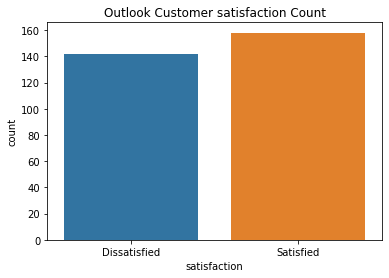

In [11]:
sns.countplot(x="satisfaction", data=dataset)
plt.title('Outlook Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

In our data, number of both satisfied and dissatisfied cutomer are almost equal. So, our dataset is balanced.

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

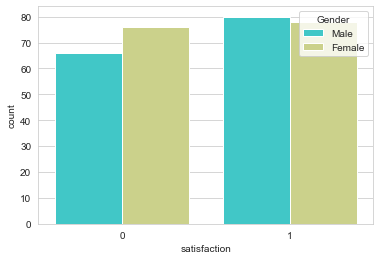

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='satisfaction',hue='Gender',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Type of Magazine', ylabel='count'>

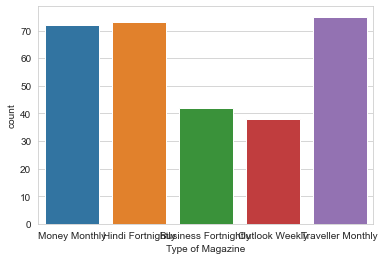

In [13]:
sns.countplot(x='Type of Magazine',data=dataset)

<AxesSubplot:xlabel='Type of Magazine', ylabel='count'>

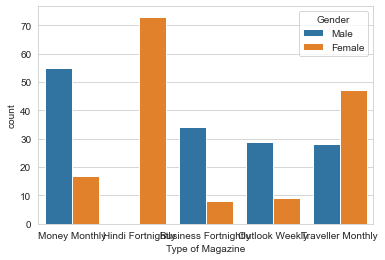

In [14]:
sns.countplot(x='Type of Magazine',hue='Gender',data=dataset)

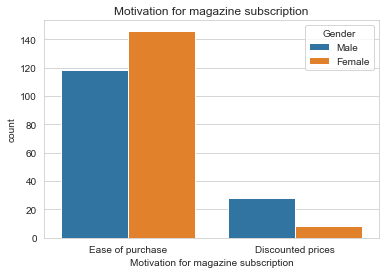

In [15]:
sns.countplot(x="Motivation for magazine subscription",hue='Gender',data=dataset)
plt.title('Motivation for magazine subscription')
plt.show()

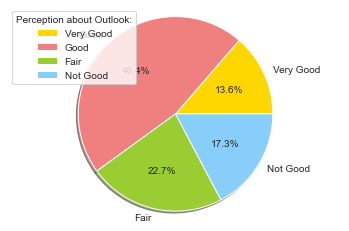

In [16]:
labels= 'Very Good','Good','Fair','Not Good'
Sizes=[15,51,25,19]
colors=['gold','lightcoral','yellowgreen','lightskyblue']

#plot
plt.pie(Sizes,labels=labels,colors=colors,
autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.legend(title = "Perception about Outlook:")
plt.show()
        

<AxesSubplot:xlabel='Areas over which Outlook needs improvement', ylabel='count'>

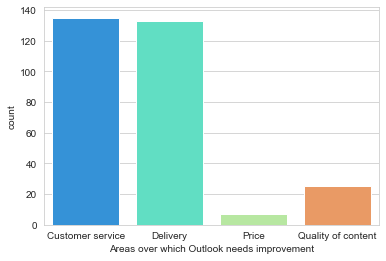

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Areas over which Outlook needs improvement',data=dataset,palette='rainbow')

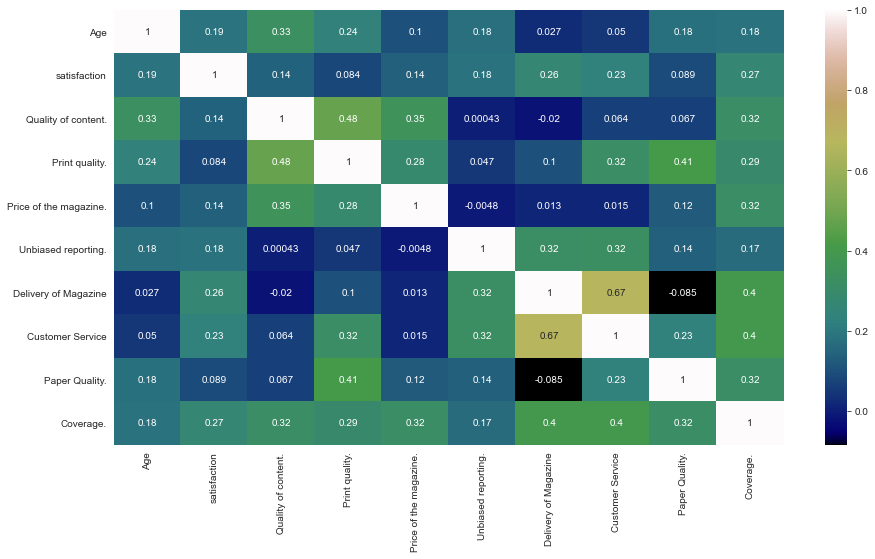

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(dataset.corr(),cmap='gist_earth',annot=True)
plt.show()

C:\Users\pranj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery of Magazine', ylabel='Density'>

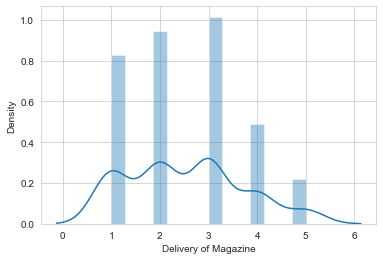

In [19]:
sns.distplot(dataset['Delivery of Magazine'])

In [20]:

category = ["Quality of content.", "Print quality.", "Price of the magazine.", "Unbiased reporting.", "Delivery of Magazine" ,"Customer Service", "Paper Quality.", "Coverage." ]
for c in category:
    print ("{} \n".format(dataset[c].value_counts()))

4    179
5     66
3     46
2      9
Name: Quality of content., dtype: int64 

4    147
5     99
3     36
2      9
1      9
Name: Print quality., dtype: int64 

4    115
5    113
3     46
2     26
Name: Price of the magazine., dtype: int64 

5    176
4     97
3     18
2      9
Name: Unbiased reporting., dtype: int64 

3    87
2    81
1    71
4    42
5    19
Name: Delivery of Magazine, dtype: int64 

2    145
1     55
3     46
4     41
5     13
Name: Customer Service, dtype: int64 

4    196
5     78
3     12
2      8
1      6
Name: Paper Quality., dtype: int64 

3    93
4    92
5    91
2    18
1     6
Name: Coverage., dtype: int64 



<AxesSubplot:xlabel='Quality of content.', ylabel='count'>

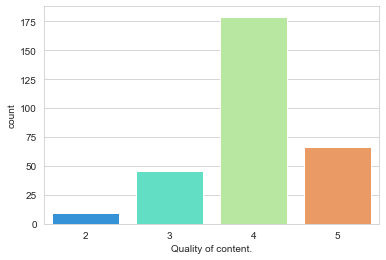

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Quality of content.',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Print quality.', ylabel='count'>

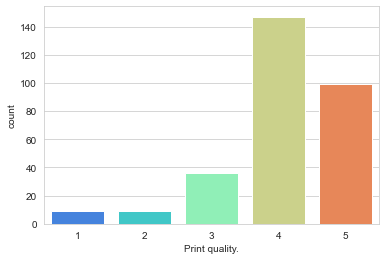

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Print quality.',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Price of the magazine.', ylabel='count'>

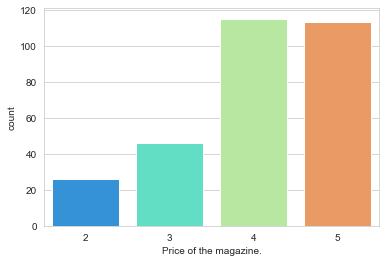

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Price of the magazine.',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Unbiased reporting.', ylabel='count'>

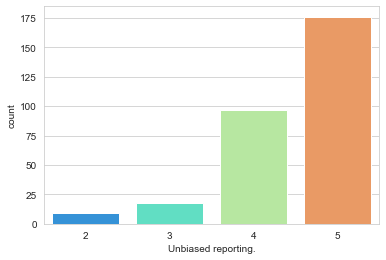

In [24]:

sns.set_style('whitegrid')
sns.countplot(x='Unbiased reporting.',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Delivery of Magazine', ylabel='count'>

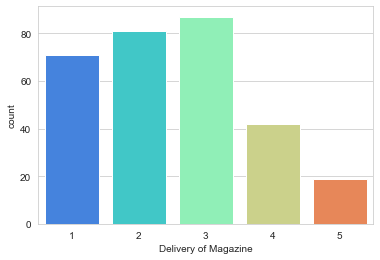

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Delivery of Magazine',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Customer Service', ylabel='count'>

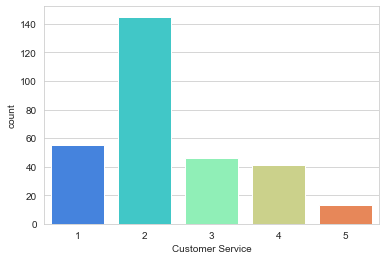

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Customer Service',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Paper Quality.', ylabel='count'>

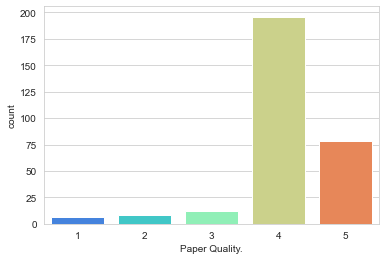

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Paper Quality.',data=dataset,palette='rainbow')

<AxesSubplot:xlabel='Coverage.', ylabel='count'>

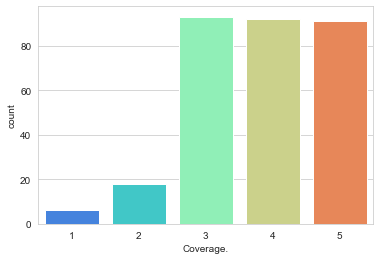

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Coverage.',data=dataset,palette='rainbow')

# Data Cleaning

Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Age                                         300 non-null    int64 
 1   Gender                                      300 non-null    object
 2   Type of Magazine                            300 non-null    object
 3   Motivation for magazine subscription        300 non-null    object
 4   Subscriber                                  300 non-null    object
 5   satisfaction                                300 non-null    int64 
 6   Quality of content.                         300 non-null    int64 
 7   Print quality.                              300 non-null    int64 
 8   Price of the magazine.                      300 non-null    int64 
 9   Unbiased reporting.                         300 non-null    int64 
 10  Delivery of Magazine      

In [30]:
dataset.drop(['Age', 'Gender', 'Type of Magazine', 'Motivation for magazine subscription', 'Subscriber', 'Perception about Outlook', 'Areas over which Outlook needs improvement'],axis=1,inplace=True)

In [31]:
dataset.head()

,satisfaction,Quality of content.,Print quality.,Price of the magazine.,Unbiased reporting.,Delivery of Magazine,Customer Service,Paper Quality.,Coverage.
0,1,3,3,5,4,3,1,2,4
1,1,4,3,2,4,1,1,4,5
2,1,4,4,5,5,3,3,5,5
3,0,4,4,4,4,3,3,4,4
4,1,4,4,4,5,3,2,5,5


C:\Users\pranj\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


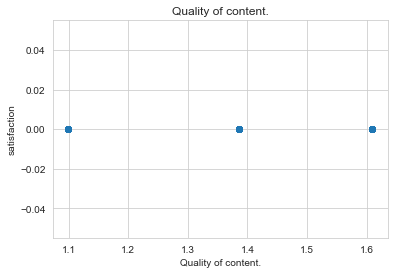

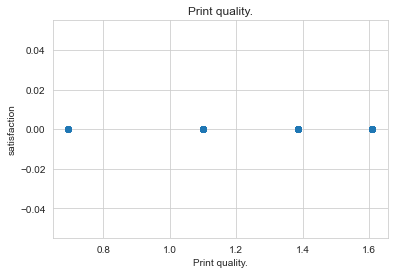

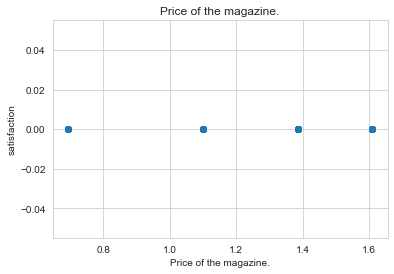

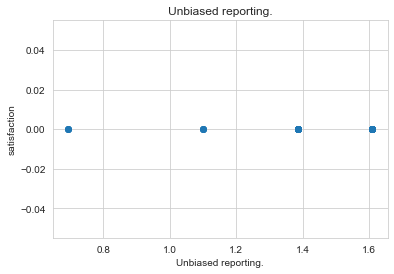

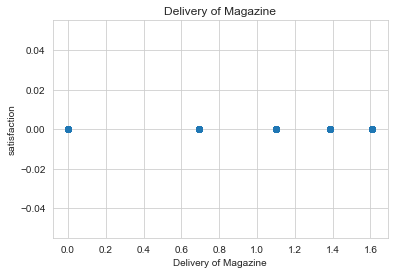

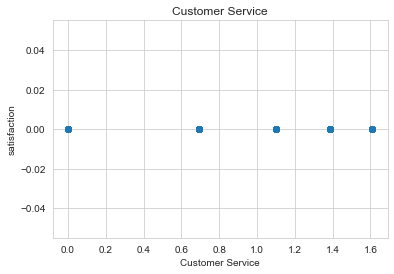

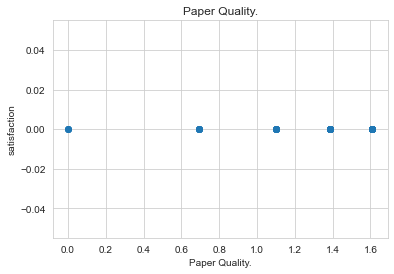

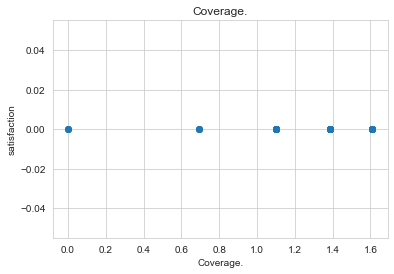

In [32]:
## We will be using logarithmic transformation


for feature in dataset:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['satisfaction']=np.log(data['satisfaction'])
        plt.scatter(data[feature],data['satisfaction'])
        plt.xlabel(feature)
        plt.ylabel('satisfaction')
        plt.title(feature)
        plt.show()

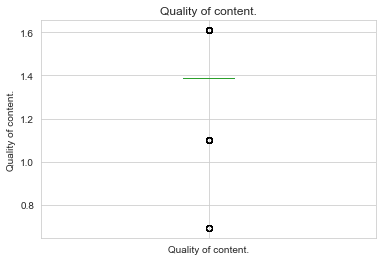

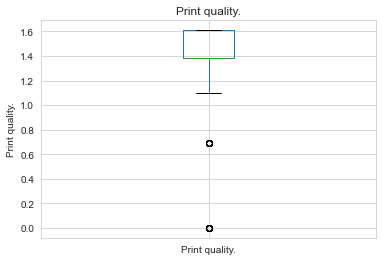

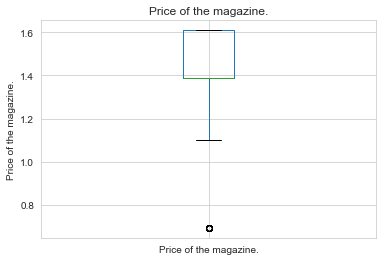

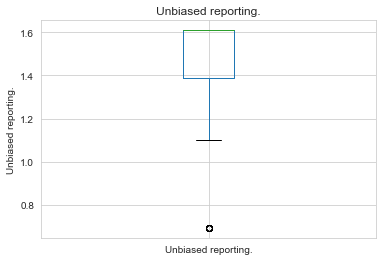

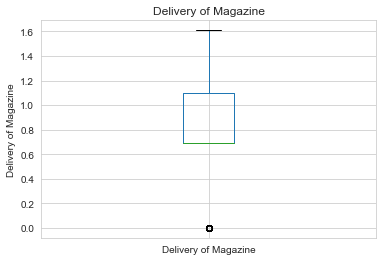

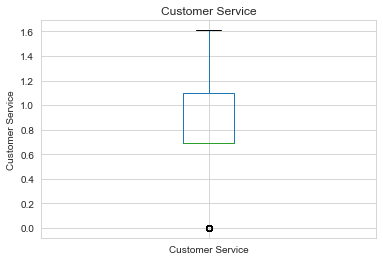

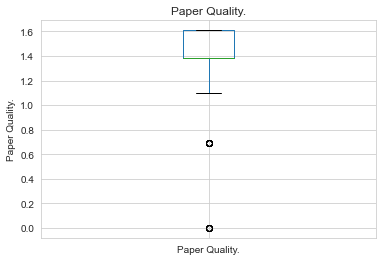

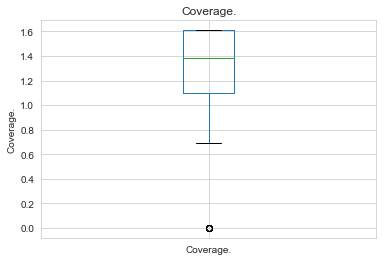

In [33]:
for feature in dataset:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<AxesSubplot:>

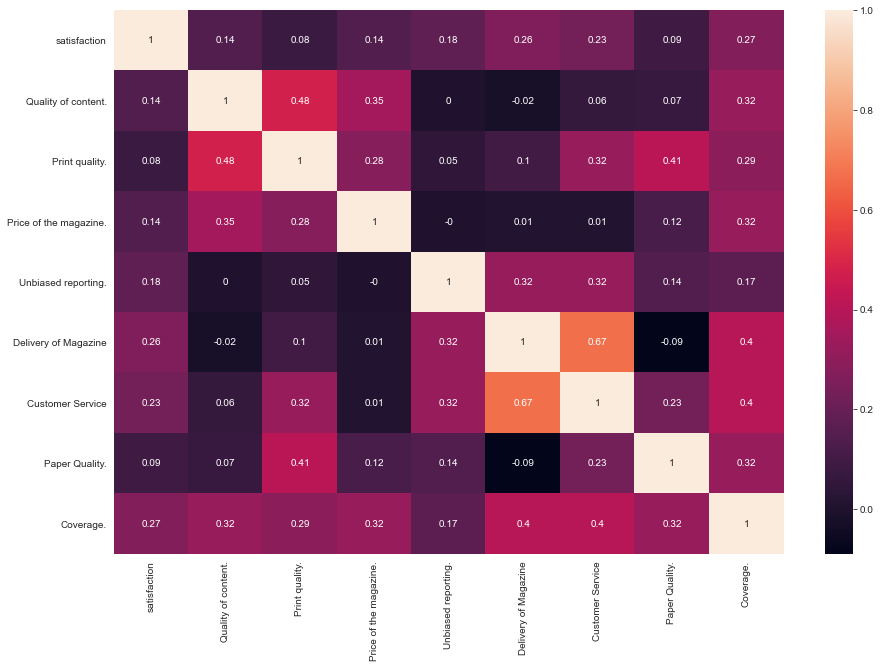

In [34]:
plt.figure(figsize=(15,10))
#This shows how much related is one parameter to the other in the dataset. 
sns.heatmap(np.round(dataset.corr(),2),annot=True)

# Model Building
#We have to train our data using linear regression algorithm and check the values for test data

In [35]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
X.shape


(300, 8)

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,3,4])],remainder='passthrough')
X = np.array(ct.fit_transform(X),dtype=np.float)

X.shape

(300, 22)

# Model Selection

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, random_state=0)

sc_X  = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [38]:
#function to plot learning curve for any classifier
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Error")
    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.tight_layout()

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg1=LogisticRegression(max_iter=2500)
log_reg1.fit(X_train_sc,y_train)
pred_log1=log_reg1.predict(X_test_sc)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log1))
print('Accuracy is', accuracy_score(y_test,pred_log1))

Confusion Matrix is
 [[ 9  4]
 [ 4 13]]
Accuracy is 0.7333333333333333


In [40]:
log_reg3=LogisticRegression(max_iter=2500)
log_reg3.fit(X_train,y_train)
pred_log3=log_reg3.predict(X_test)

print("Test Scores")
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log3))
print('Accuracy is\n', accuracy_score(y_test,pred_log3))

'''
pred_log_train=log_reg3.predict(X_train)
print("Train Scores")
print('Confusion Matrix is\n',confusion_matrix(y_train,pred_log_train))
print('Accuracy is', accuracy_score(y_train,pred_log_train))
'''

Test Scores
Confusion Matrix is
 [[ 9  4]
 [ 4 13]]
Accuracy is
 0.7333333333333333


'\npred_log_train=log_reg3.predict(X_train)\nprint("Train Scores")\nprint(\'Confusion Matrix is\n\',confusion_matrix(y_train,pred_log_train))\nprint(\'Accuracy is\', accuracy_score(y_train,pred_log_train))\n'

In [41]:
log_reg2=LogisticRegression(max_iter=2500)
log_reg2.fit(X_train_minmax,y_train)
pred_log2=log_reg2.predict(X_test_minmax)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log2))
print('Accuracy is', accuracy_score(y_test,pred_log2))

Confusion Matrix is
 [[ 9  4]
 [ 6 11]]
Accuracy is 0.6666666666666666


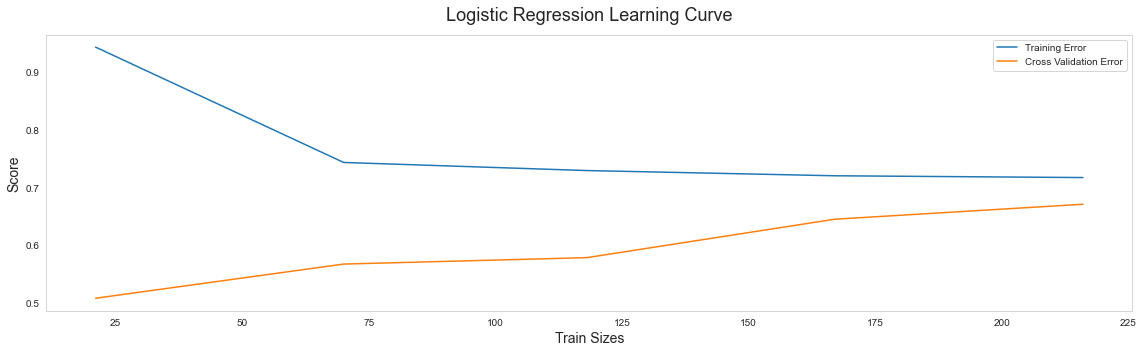

In [42]:
plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train_minmax, y_train, log_reg2,title)

We can see that as train sizes increases cross validation score and training score are converging. This means that model is learning But still there is some deviation between them.

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
for d in range(20,30):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dtc.fit(X_train,y_train)
  pred_dtc=dtc.predict(X_test)
  print("d=",d)
  print(accuracy_score(y_test,pred_dtc))

d= 20
0.8666666666666667
d= 21
0.8666666666666667
d= 22
0.8666666666666667
d= 23
0.8666666666666667
d= 24
0.8666666666666667
d= 25
0.8666666666666667
d= 26
0.8666666666666667
d= 27
0.8666666666666667
d= 28
0.8666666666666667
d= 29
0.8666666666666667


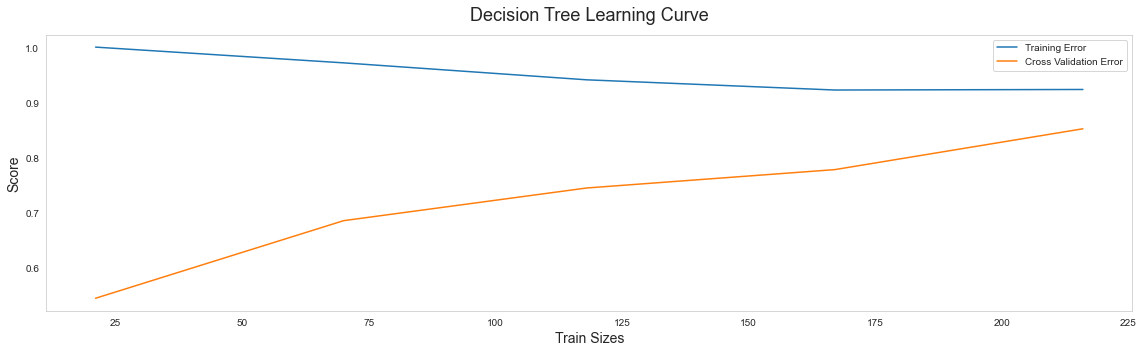

In [44]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(X_train,y_train)
#pred_dtc=dtc.predict(X_test)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train, y_train, dtc_best,title)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)

rfc.fit(X_train_sc, y_train)

pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(y_test,pred_rfc))
print('Train Score:',accuracy_score(y_train,rfc_train))

print('Confusion Matrix for test set  \n',confusion_matrix(y_test,pred_rfc))

Test Score: 0.8333333333333334
Train Score: 0.9185185185185185
Confusion Matrix for test set  
 [[11  2]
 [ 3 14]]


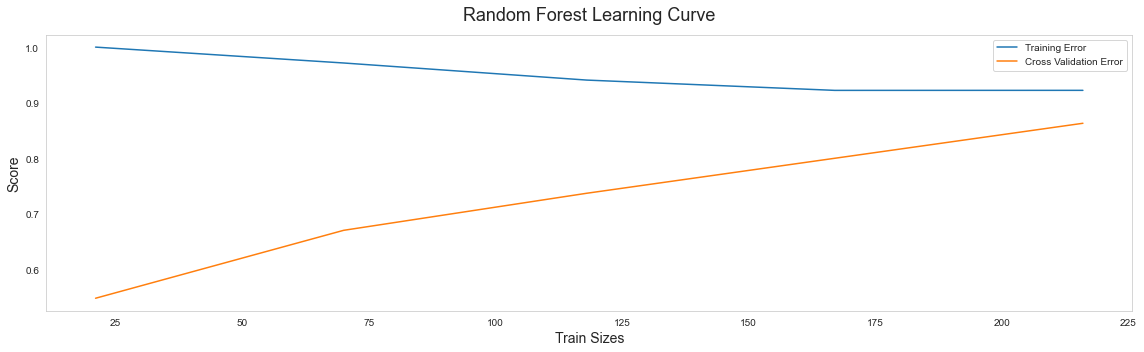

In [47]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train, y_train, rfc,title)

# Evaluation

In our problem to classify customers as satisfied or dissatisfied, best accuracy was achieved using Random forest classifier. The best train score and test score achieved are 0.91 and 0.83 respectively.